In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hospitals_full = pd.read_csv("../../data_hospital_level/processed/hospital_level_info_merged.csv", index_col = 0)


In [3]:
CMI_df = pd.read_excel("../../data_hospital_level/07_CMI_data.xlsx")
CMI_df["Provider No."] = CMI_df["Provider No."].astype(str).apply(lambda x : x.zfill(6))

In [4]:
hospitals_with_CMI = hospitals_full.merge(CMI_df, how = "left", left_on = "CMS Certification Number", right_on = "Provider No.").drop(columns = ["Provider No."])

In [5]:
hospitals_full[hospitals_full["CMS Certification Number"].apply(lambda x: not x.isdigit())][20:40]

,CMS Certification Number,Facility Name_x,Street Address_x,City_x,State_x,ZIP,System Affiliation,Type of Facility,Total Employees,Urban or Rural Designation,...,City,State,Zip Code,Street Address 1,Street Address 2,City.1,State.1,Zip Code.1,Facility ID_y,Website
818,06003F,Evans United States Army Hospital,1650 Cochrane Circle,Fort Carson,CO,80913,"TRICARE - Falls Church, VA",Short Term Acute Care,0.0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://evans.amedd.army.mil/
822,06005F,Rocky Mountain Regional VA Medical Center,1700 North Wheeling Street,Aurora,CO,80045,"Department of Veterans Affairs - Washington, DC",Short Term Acute Care,0.0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT AVAILABLE
828,06007F,VA Western Colorado Health Care System,2121 North Avenue,Grand Junction,CO,81501,"Department of Veterans Affairs - Washington, DC",Short Term Acute Care,0.0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT AVAILABLE
935,07003F,VA Connecticut Healthcare System - West Haven ...,950 Campbell Avenue,West Haven,CT,06516,"Department of Veterans Affairs - Washington, DC",Short Term Acute Care,0.0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT AVAILABLE
955,08002F,Wilmington VA Medical Center,1601 Kirkwood Highway,Wilmington,DE,19805,"Department of Veterans Affairs - Washington, DC",Short Term Acute Care,0.0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wilmington.va.gov/
971,09002F,Washington DC VA Medical Center,50 Irving Street Northwest,Washington,DC,20422,"Department of Veterans Affairs - Washington, DC",Short Term Acute Care,0.0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.washingtondc.va.gov/
972,09005E,The HSC Pediatric Center,"1731 Bunker Hill Road, Northeast",Washington,DC,20017,"Not In Any System - ,",Childrens,0.0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT AVAILABLE
1039,10009F,Bay Pines VA Healthcare System,10000 Bay Pines Boulevard,Bay Pines,FL,33744,"Department of Veterans Affairs - Washington, DC",Short Term Acute Care,0.0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.baypines.va.gov/
1062,10013F,Naval Hospital Jacksonville,2080 Child Street,Jacksonville,FL,32214,"TRICARE - Falls Church, VA",Short Term Acute Care,0.0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.med.navy.mil/SITES/NAVALHOSPITALJAX...
1070,10015F,Lake City VA Medical Center,619 South Marion Avenue,Lake City,FL,32025,"Department of Veterans Affairs - Washington, DC",Short Term Acute Care,0.0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.northflorida.va.gov/


In [6]:
hospitals_full["CMS Certification Number"].apply(lambda x: len(x) != 6).any()

False

In [28]:
hospitals_with_CMI["Teaching"] = ~hospitals_with_CMI["CCN"].isna()

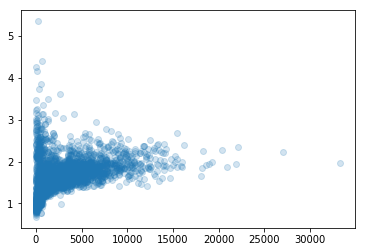

In [8]:
plt.scatter(CMI_df["Total Cases"], CMI_df["Case Mix Index (CMI)"], alpha = 0.2)

In [29]:
temp_df = hospitals_with_CMI[(hospitals_with_CMI["ICU Beds"] > 0) & hospitals_with_CMI["Teaching"] == True ]

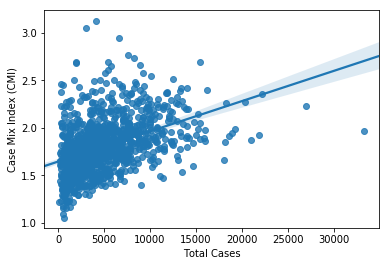

In [30]:
sns.regplot(temp_df["Total Cases"], temp_df["Case Mix Index (CMI)"])

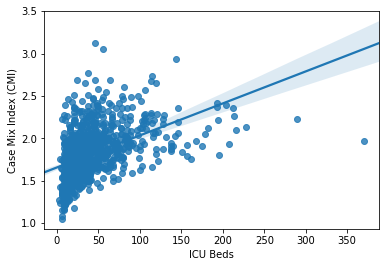

In [31]:
sns.regplot(temp_df["ICU Beds"], temp_df["Case Mix Index (CMI)"])

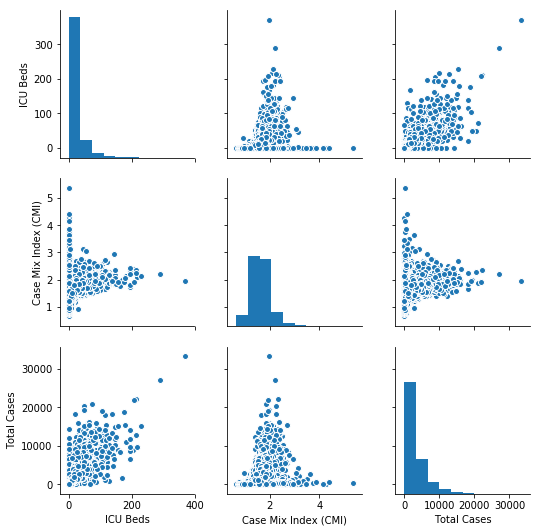

In [15]:
sns.pairplot(hospitals_with_CMI[["ICU Beds","Case Mix Index (CMI)", "Total Cases"]].dropna())

In [33]:
temp_df.sort_values(by = "Case Mix Index (CMI)", ascending = False)[["Facility Name_x", "Case Mix Index (CMI)"]][:50]

,Facility Name_x,Case Mix Index (CMI)
621,Keck Hospital of USC,3.1275
5920,Swedish Cherry Hill Campus,3.0488
5275,CHI Saint Luke's Health-Baylor Saint Luke's Me...,2.9389
5234,Memorial Hermann - Texas Medical Center,2.7664
2540,University of Maryland Medical Center,2.7335
4229,The Cleveland Clinic,2.6933
3571,Deborah Heart and Lung Center,2.6933
147,Banner - University Medical Center Phoenix,2.6880
806,Presbyterian/Saint Luke's Medical Center,2.6770
4653,Hospital of the University of Pennsylvania,2.6587


In [34]:
hospitals_with_CMI.sort_values(by = "Case Mix Index (CMI)", ascending = False)[["Facility Name_x", "Case Mix Index (CMI)"]][:50]

,Facility Name_x,Case Mix Index (CMI)
3379,Nebraska Spine Hospital,5.3644
4436,Oklahoma Spine Hospital,4.4059
2059,Doctors Hospital,4.2535
5422,Northwest Hills Surgical Hospital,4.1653
4442,Tulsa Spine And Specialty Hospital,3.8545
2369,The Spine Hospital of Louisiana,3.7373
6279,Baylor Scott and White The Heart Hospital - Plano,3.6236
3374,CHI Health Nebraska Heart,3.4937
6331,Saint Camillus Medical Center,3.4701
5143,Saint Thomas Hospital for Specialty Surgery,3.3401


Hospitals with highest CMI seem to be specialty hospitals

In [36]:
hospitals_full["ICU Beds"].sum()

74564.0